# Guardado
Es posible guardar los gráficos generados en formato .png (o cualquier otro) en sus computadoras. 
- Otra alternativa válida sería hacerles captura de pantalla directo desde Jupyter!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2015 = raw[(raw['anio'] == '2015') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2015[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 
df

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


# Pandas

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


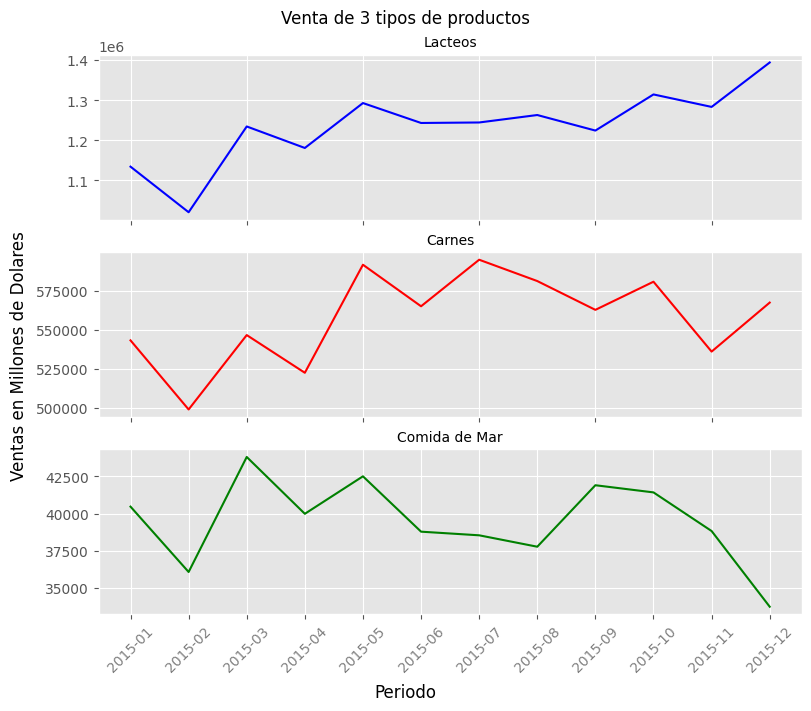

In [ ]:
plt.style.use('ggplot')

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, constrained_layout=True)

fig.set_size_inches(8, 7)
fig.suptitle('Venta de 3 tipos de productos')
fig.supylabel('Ventas en Millones de Dolares')
fig.supxlabel('Periodo') 

df.plot.line(y='DAIRY', ax=ax1, color='blue')
df.plot.line(y='MEATS',ax=ax2,color='red')
df.plot.line(y='SEAFOOD',ax=ax3, color='green')

title_font = {
    'size': 10,
    'name': 'Helvetica'
}

ax1.set_title('Lacteos', fontdict=title_font)
ax2.set_title('Carnes', fontdict=title_font)
ax3.set_title('Comida de Mar', fontdict=title_font)

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

ax3.set_xticks(np.arange(0, len(df))) 
ax3.set_xticklabels(df.index.values, rotation=45, fontdict={'color':  'grey', 'size': 10})

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

# Guardado de Figura - Es importante hacerlo antes de plt.show()
# lo llamamos al final, porque ya tiene las configuraciones.
# dpi son pixeles por pulgada, que aumenta la resolución de la imagen
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('nivel_1.5_matplotlib.png', format='png', dpi=1200)

plt.show()


# Seaborn

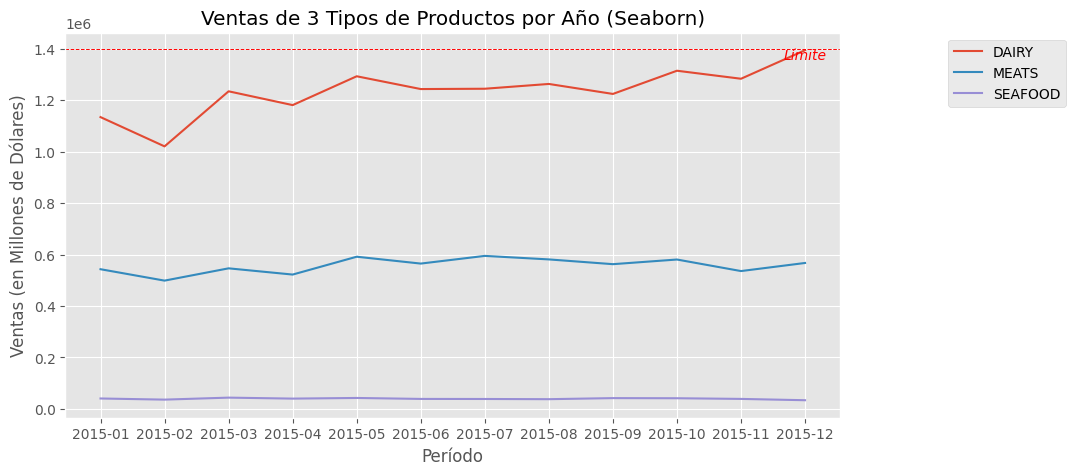

In [ ]:
plt.figure(
    figsize=(10, 5)
)

g = sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family',
    errorbar=None
)

g.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

g.axhline(
    1400000,
    linestyle='dashed',
    color='red',
    alpha=1,
    linewidth=0.7
)

g.annotate(
    'Límite', # El texto
    xy = (11, 1400000),
    xytext = (11, 1400000), 
    size=10, 
    color='red',
    horizontalalignment='center',
    verticalalignment='top',
    fontstyle='italic'
)

g.legend(bbox_to_anchor=(1.3, 1))

# Guardado de Figura
# Mismo metodo que Matplotlib
plt.savefig(
    'nivel_1.5_seaborn.png', 
    format='png',
    bbox_inches='tight' # con esto se exporta todo lo visible dentro de la imagen. Por defecto no exporta lo que esta fuera del canvas como la leyenda
)

plt.show()

# Plotly

In [ ]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "x": "Periodo",
        "sales": "Ventas por año (en millones de $)",
        "family": "Tipo de Producto"
    }
)

fig.update_layout( 
    font_family="Rockwell",
    font_color="black"
)

fig.update_xaxes(
    tickangle=45,
    tickmode='array',
    tickvals=df.index.values,
    tickfont={
        'color': 'grey',
        'size': 10
    }
)

fig.update_yaxes(
    tickfont={
        'color': 'grey',
        'size': 10
    }
)

fig.update_yaxes(
    nticks=20
)

fig.add_annotation(
    x='2015-11',
    y=1300000,
    text="Noviembre",
    showarrow=True,
    arrowhead=3, 
    arrowsize=1, 
    arrowwidth=2,
    arrowcolor="grey",
    opacity=1,
    font={
        'family': "Arial",
        'size': 10,
        'color': "black"
    }
)

fig.add_hline(
    y=1400000, 
    line_dash="dot",
    annotation_text="Límite",
    annotation_position="top left",
    annotation_font_size=10,
    annotation_font_color="red",
    opacity=0.8,
    line_width=1,
    line_color='red',
)

fig.update_layout(
    legend_title_text='Leyenda',
    legend=dict( 
        y=0.5,
        x=1.05,
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="LightGrey",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()
# dentro de la imagen al hacer hover se puede ver la opción de guardado

En Plotly podemos simplemente dar click en el botón de Guardar en el gráfico interactivo